In [1]:
#Importez les librairies
import pandas as pd
import numpy as np
import seaborn as csv
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
#Importez les fichiers csv
population = pd.read_csv('Population_2000_2018.csv')
dispoAlimentaire = pd.read_csv('DisponibiliteAlimentaire_2017.csv')

#Pestel Analysis
#Politique - Stabilité Politique
stab_pol = pd.read_csv('Political Stability.csv')

#Economique - PIB
GDP = pd.read_csv('GDP.csv')

#Socioculturel - Pourcentage de viande consommée qui est du poulet
appro_aliment = pd.read_csv('Food Supply.csv')

#Ecologique - Emissions provenant des élévages de poulets
émissions = pd.read_csv('Chicken Emissions.csv')

#Technologique - Crédit à l'agriculture
crédit = pd.read_csv('Credit agriculture.csv')

#Légal - Investissements gouvernmental dans l'agriculture
invest_govt = pd.read_csv('Government Investment.csv')

## Population

In [3]:
#Verifiez le shape
population.shape

(4411, 15)

In [4]:
#Verifiez le head
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [5]:
#Verifiez les types des données
population.dtypes

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                       object
dtype: object

In [6]:
#Voir les années
display(population['Année'].unique())

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [7]:
#Verifiez si 'Code Année' a les memes valeurs que 'Année'
population['Code année'].equals(population['Année'])

True

In [8]:
# Supprimez toutes les données sauf les données de 2017 (le ficher DisponibiliteAlimentaire_2017.csv a seulement données pour 2017)
population = population[population['Année']==2017]

# Supprimez la colonne 'Année'
population.drop(columns=['Année', 'Code année'], inplace=True)

In [9]:
#Verifiez si il y a des valeurs 'nulls'
pop_na = population.isnull().sum()
print(pop_na[pop_na>0])

Note    235
dtype: int64


In [10]:
#Trouvez les valeurs dans la colonne 'Note'
print("Valeur de la colonne Note =", population['Note'].unique())

Valeur de la colonne Note = [nan
 'UNDESA, Population Division – World Population Prospects, the 2017 Revision']


In [11]:
#Supprimez la colonne 'Note' parce que c'est pas important pour l'analyse.
population.drop(columns='Note', inplace=True)

In [12]:
#Multipliez 'Valeur' par 1000 et changez nom à Population - valeurs des colonnes 'Unité' et 'Élément'
population['Valeur'] = population['Valeur']*1000
population = population.rename(columns={'Valeur': 'Population'})

#Supprimez les colonnes 'Unité' et 'Elément'
population.drop(columns=['Élément','Unité'], inplace=True)

In [13]:
#Trouvez les colonnes où il y a seulement une valeur
print(population.nunique())

Code Domaine                1
Domaine                     1
Code zone                 236
Zone                      236
Code Élément                1
Code Produit                1
Produit                     1
Population                236
Symbole                     2
Description du Symbole      2
dtype: int64


In [14]:
#Trouvez les valeurs dans les colonnes 'Symbole' et 'Description du Symbole'
print("Valeurs dans la colonne 'Symbole' =", population['Symbole'].unique())
print("Valeurs dans la colonne 'Description du Symbole' =", population['Description du Symbole'].unique())

Valeurs dans la colonne 'Symbole' = ['X' 'A']
Valeurs dans la colonne 'Description du Symbole' = ['Sources internationales sûres'
 'Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées']


- Les colonnes 'Code Domaine', 'Domaine', 'Code élément', 'Code Produit' et 'Code Année' ne sont pas important  - je peux les supprimer.
- De plus, les colonnes 'Symbole' et 'Description du Symbole' ne sont pas important. Je peux donc les supprimer.
- Les valuers dans 'Code Zone' correspond à les pays dans 'Zone' et ont la meme quantité des valeurs. Pour éviter la duplication des données, je vais supprimer « Code Zone ». 

In [15]:
#Supprimez les colonnes Code Domaine, Domaine, Code Element, Element, Code Produit, Produit, et Unité
population = population.drop(columns=['Code Domaine','Domaine','Code Élément','Code Produit','Produit', 'Code zone', 'Symbole', 'Description du Symbole'])

In [16]:
population.head()

,Zone,Population
17,Afghanistan,36296113.0
36,Afrique du Sud,57009756.0
55,Albanie,2884169.0
74,Algérie,41389189.0
93,Allemagne,82658409.0


In [17]:
#Verifiez s'il y a des outliers
population.describe()

,Population
count,2.360000e+02
mean,3.198362e+07
std,1.318949e+08
min,7.930000e+02
25%,3.803032e+05
50%,5.203510e+06
75%,1.930842e+07
max,1.421022e+09


In [18]:
#Verifiez que 'Zone' peut être utilisé comme la clé primaire
print("Shape du fichier 'Population' - ", population.shape)
print('-----')
print("Nombre de lignes unique dans la colonne 'Zone' - ", population['Zone'].nunique())

Shape du fichier 'Population' -  (236, 2)
-----
Nombre de lignes unique dans la colonne 'Zone' -  236


## Disponibilité Alimentaire

In [19]:
#Verifiez le shape
dispoAlimentaire.shape

(176600, 14)

In [20]:
#Verifiez le head
dispoAlimentaire.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [21]:
#Verifiez les types des données
dispoAlimentaire.dtypes

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object

In [22]:
#Verifiez si il y a des valeurs 'nulls'
dispo_ali_na = dispoAlimentaire.isnull().sum()
print(dispo_ali_na[dispo_ali_na>0])

Series([], dtype: int64)


In [23]:
#Trouvez les colonnes où il y a seulement une valeur
print(dispoAlimentaire.nunique())

Code Domaine                 1
Domaine                      1
Code zone                  174
Zone                       174
Code Élément                17
Élément                     17
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7250
Symbole                      2
Description du Symbole       2
dtype: int64


In [24]:
#Trouvez les valeurs dans les colonnes 'Symbole' et 'Description du Symbole'
print("Valeurs dans la colonne 'Symbole' =", dispoAlimentaire['Symbole'].unique())
print("Valeurs dans la colonne 'Description du Symbole' =", dispoAlimentaire['Description du Symbole'].unique())

Valeurs dans la colonne 'Symbole' = ['S' 'Fc']
Valeurs dans la colonne 'Description du Symbole' = ['Données standardisées' 'Donnée calculée']


- Les valeurs dans les colonnes 'Symbole' et 'Description du Symbole' ne sont pas importants - je peux suprimmer les deux colonnes.
- Je peux également supprimer les colonnes 'Code Domaine','Domaine', 'Année' et 'Code année' parce que je n'ai pas besoin d'eux pour l'analyse.
- Les valuers dans 'Code Zone' correspond à les pays dans 'Zone' et ont la meme quantité des valeurs. Pour éviter la duplication des données, je vais supprimer « Code Zone ». 
- De la même manière, je peux supprimer les colonnes 'Code Élément' et 'Code Produit' parce qu'elles correspondent à les colonnes 'Élément' et 'Produit' respectivement. 

In [25]:
#Supprimez des colonnes
drop_columns = ['Code Domaine','Domaine','Code zone', 'Code année', 'Année','Code Élément', 'Code Produit','Symbole','Description du Symbole']

dispoAlimentaire.drop(columns=drop_columns, inplace=True)

In [26]:
#Trouvez les valeurs dans la colonne 'Unité'
dispoAlimentaire['Unité'].unique()

array(['Milliers de tonnes', 'kg', 'Kcal/personne/jour',
       'g/personne/jour'], dtype=object)

In [27]:
#Trouvez les valeurs dans la colonne 'Élément'
dispoAlimentaire['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

Les unités pour 'kg', 'Kcal/personne/jour' et 'g/personne/jour' sont déjà dans les noms de titres, mais les unités pour les éléments avec 'Milliers de tonnes' ne le sont pas.

In [28]:
#Multipliez les valeurs de la colonne 'Valeur' par 1000 lorsque la valeur de la colonne 'Unité' est égale à 'Milliers de tonnes'
dispoAlimentaire.loc[dispoAlimentaire['Unité']=='Milliers de tonnes', 'Valeur']*=1000

In [29]:
#Trouvez les valeurs dans la colonne 'Element' où leurs unités sont 'Milliers de tonnes'
Tonnes = dispoAlimentaire.loc[dispoAlimentaire['Unité']=='Milliers de tonnes',:]

# Afficher les valeurs dans la colonne 'Element' où leurs unités sont 'Milliers de tonnes'
Tonnes['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture', 'Traitement',
       'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [30]:
# Ajoutez la phrase « (Tonnes) » pour les articles dont l'unité est « Milliers de tonnes ».
list_tonnes = ['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture', 'Traitement',
       'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes']

ajoute_tonnes = dispoAlimentaire['Élément'].isin(list_tonnes)

dispoAlimentaire.loc[ajoute_tonnes, 'Élément'] = dispoAlimentaire.loc[ajoute_tonnes, 'Élément'].astype(str) + ' (Tonnes)'

In [31]:
#Supprimez la colonne 'Unité'
dispoAlimentaire = dispoAlimentaire.drop(columns='Unité')

In [32]:
#Verifiez s'il y a des outliers
dispoAlimentaire.describe()

,Valeur
count,1.766000e+05
mean,2.069351e+05
std,4.762093e+06
min,-1.038800e+07
25%,0.000000e+00
50%,1.200000e-01
75%,3.000000e+03
max,7.585480e+08


In [33]:
# Il y a des valeurs negatifs - Trouvez le nombre des lignes où Valeur est moins que zéro
négatif_da = dispoAlimentaire.loc[dispoAlimentaire['Valeur']<0]
négatif_da.count()

Zone       2544
Élément    2544
Produit    2544
Valeur     2544
dtype: int64

In [34]:
#Trouvez les valeurs dans la colonne 'Element' où la valeur est négative
négatif_da["Élément"].value_counts()

Variation de stock (Tonnes)                       1385
Résidus (Tonnes)                                   913
Disponibilité intérieure (Tonnes)                  187
Alimentation pour touristes (Tonnes)                57
Aliments pour animaux (Tonnes)                       1
Autres utilisations (non alimentaire) (Tonnes)       1
Name: Élément, dtype: int64

Après avoir vérifié les données de la FAO, j'ai découvert que toutes ces colonnes peuvent avoir des valeurs négatives (par exemple, l'offre de produit moins la demande de produit) - il n'est pas nécessaire de faire quoi que ce soit avec ces cellules.

In [35]:
# Pivoter le tableau
dispoAlimentaire = dispoAlimentaire.pivot_table(index=['Zone', 'Produit'], columns = 'Élément', values='Valeur').reset_index()

Comme "La poule qui chante" ne s'intéresse qu'aux produits à base de poulet, je supprimerai les autres types d'aliments.

In [36]:
# Supprimez toutes les lignes sauf si elles contiennent "Viande de volaille".
dispoAlimentaire = dispoAlimentaire.loc[dispoAlimentaire['Produit']=='Viande de Volailles']

# Supprimez la colonne 'Produit'
dispoAlimentaire = dispoAlimentaire.drop(columns = 'Produit')

In [37]:
#Supprimez les colonnes je ne vais pas utiliser dans l'analyse
dispoAlimentaire = dispoAlimentaire.drop(columns=['Alimentation pour touristes (Tonnes)',
 'Aliments pour animaux (Tonnes)',
 'Autres utilisations (non alimentaire) (Tonnes)',
 'Disponibilité alimentaire (Kcal/personne/jour)',
 'Disponibilité de matière grasse en quantité (g/personne/jour)',
 'Disponibilité de protéines en quantité (g/personne/jour)',
 'Disponibilité intérieure (Tonnes)',
 'Exportations - Quantité (Tonnes)',
 'Importations - Quantité (Tonnes)',
 'Nourriture (Tonnes)',
 'Pertes (Tonnes)',
 'Production (Tonnes)',
 'Résidus (Tonnes)',
 'Semences (Tonnes)',
 'Traitement (Tonnes)',
 'Variation de stock (Tonnes)'])

In [38]:
# Ajouter la phrase 'Viande de volaille  - ' à la colonne 'Disponibilité alimentaire en quantité (kg/personne/an)'
dispoAlimentaire.rename(columns={'Disponibilité alimentaire en quantité (kg/personne/an)': 'Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)'}, inplace=True)

In [39]:
#Cherchez les valeurs null
dispoAlimentaire.isnull().sum()

Élément
Zone                                                                           0
Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)    0
dtype: int64

In [40]:
#Verifiez le shape
dispoAlimentaire.shape

(172, 2)

In [41]:
dispoAlimentaire.head()

Élément,Zone,Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)
78,Afghanistan,1.53
173,Afrique du Sud,35.69
265,Albanie,16.36
357,Algérie,6.38
452,Allemagne,19.47


In [42]:
dispoAlimentaire.describe()

Élément,Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)
count,172.000000
mean,20.213372
std,15.860311
min,0.130000
25%,6.440000
50%,18.090000
75%,30.037500
max,72.310000


In [43]:
#Verifiez que 'Zone' peut être utilisé comme la clé primaire
print("Shape du fichier 'dispoAlimentaire' - ", dispoAlimentaire.shape)
print('-----')
print("Nombre de lignes unique dans la colonne 'Zone' - ", dispoAlimentaire['Zone'].nunique())

Shape du fichier 'dispoAlimentaire' -  (172, 2)
-----
Nombre de lignes unique dans la colonne 'Zone' -  172


In [44]:
#Joignez les dataframes 'population' et 'dispoAlimentaire'
dispoAlimentaire = pd.merge(dispoAlimentaire, population, on='Zone', how='left')

## PIB

In [45]:
#Verifiez le shape
GDP.shape

(211, 7)

In [46]:
#Verifiez le head
GDP.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Indicateurs macro,Afghanistan,Valeur US $,Produit Intérieur Brut,2017,Millions d’USD,1.889635e+04
1,Indicateurs macro,Afrique du Sud,Valeur US $,Produit Intérieur Brut,2017,Millions d’USD,3.808514e+05
2,Indicateurs macro,Albanie,Valeur US $,Produit Intérieur Brut,2017,Millions d’USD,1.301973e+04
3,Indicateurs macro,Algérie,Valeur US $,Produit Intérieur Brut,2017,Millions d’USD,1.700970e+05
4,Indicateurs macro,Allemagne,Valeur US $,Produit Intérieur Brut,2017,Millions d’USD,3.690849e+06


In [47]:
#Verifiez les types des données
GDP.dtypes

Domaine     object
Zone        object
Élément     object
Produit     object
Année        int64
Unité       object
Valeur     float64
dtype: object

In [48]:
#Verifiez si il y a des valeurs 'nulls'
GDP.isnull().sum()

Domaine    0
Zone       0
Élément    0
Produit    0
Année      0
Unité      0
Valeur     0
dtype: int64

In [49]:
# Trouvez les colonnes où il y a seulement une valeur
print(GDP.nunique())

Domaine      1
Zone       211
Élément      1
Produit      1
Année        1
Unité        1
Valeur     211
dtype: int64


In [50]:
# Changez le nom de la colonne 'Valeur' à 'PIB (US$)'
GDP = GDP.rename(columns = {'Valeur':'PIB (US$)'})

# Multipliez PIB par un million
GDP["PIB (US$)"] = GDP["PIB (US$)"]*1000000

# Puis, je peux supprimer 'Unit' et 'Item'. Je peux également supprimer Domain Code, Domain, Area Code, Element Code, Element, et Item Code.
GDP = GDP.drop(columns = ['Domaine','Produit','Élément', 'Année', 'Unité'])

In [51]:
#Quand j'ai fait le final jointure de tous les fichiers, j'ai trouvé que quelque fichiers utilise le nom 'Pays-Bas (Royaume des)' et quelques fichiers utilise le noms 'Pays-Bas'
#Je vais standardiser les nom.
GDP.loc[GDP['Zone']=='Pays-Bas (Royaume des)', 'Zone'] = 'Pays-Bas'

In [52]:
#Verifiez que 'Zone' peut être utilisé comme la clé primaire
print("Shape du fichier 'GDP' - ", GDP.shape)
print('-----')
print("Nombre de lignes unique dans la colonne 'Zone' - ", GDP['Zone'].nunique())

Shape du fichier 'GDP' -  (211, 2)
-----
Nombre de lignes unique dans la colonne 'Zone' -  211


In [53]:
#Joignez les dataframes 'population' et 'dispoAlimentaire'
dispoAlimentaire_PIB = pd.merge(dispoAlimentaire, GDP, on='Zone', how='left')

In [54]:
# Pour rendre le PIB plus facile à comparer entre les pays, j'analyserai le PIB par habitant
dispoAlimentaire_PIB['PIB (US$) par habitant'] = dispoAlimentaire_PIB['PIB (US$)']/dispoAlimentaire_PIB['Population']

dispoAlimentaire_PIB.drop(columns='PIB (US$)', inplace=True)

## Stabilité Politique

In [55]:
#Verifiez le shape
stab_pol.shape

(196, 6)

In [56]:
#Verifiez le head
stab_pol.head()

,Domaine,Zone,Élément,Produit,Année,Valeur
0,Données de la sécurité alimentaire,Pays-Bas (Royaume des),Valeur,Stabilité politique et absence de violence/ter...,2017,0.92
1,Données de la sécurité alimentaire,Afghanistan,Valeur,Stabilité politique et absence de violence/ter...,2017,-2.80
2,Données de la sécurité alimentaire,Afrique du Sud,Valeur,Stabilité politique et absence de violence/ter...,2017,-0.28
3,Données de la sécurité alimentaire,Albanie,Valeur,Stabilité politique et absence de violence/ter...,2017,0.38
4,Données de la sécurité alimentaire,Algérie,Valeur,Stabilité politique et absence de violence/ter...,2017,-0.92


In [57]:
#Verifiez les types des données
stab_pol.dtypes

Domaine     object
Zone        object
Élément     object
Produit     object
Année        int64
Valeur     float64
dtype: object

In [58]:
#Verifiez si il y a des valeurs 'nulls'
stab_pol.isnull().sum()

Domaine    0
Zone       0
Élément    0
Produit    0
Année      0
Valeur     0
dtype: int64

In [59]:
# Trouvez les colonnes où il y a seulement une valeur
print(stab_pol.nunique())

Domaine      1
Zone       196
Élément      1
Produit      1
Année        1
Valeur     146
dtype: int64


In [60]:
#Changez le nom de 'Valeur' à 'Stabilité Politique'
stab_pol = stab_pol.rename(columns = {'Valeur':'Stabilité Politique'})

#Supprimez tous les colonnes avec seulement une valeur - pas besoin de ces valeurs
stab_pol = stab_pol.drop(columns = ['Domaine','Élément', 'Produit', 'Année'])

In [61]:
#Quand j'ai fait le final jointure de tous les fichiers, j'ai trouvé que quelque fichiers utilise le nom 'Pays-Bas (Royaume des)' et quelques fichiers utilise le noms 'Pays-Bas'
#Je vais standardiser les nom.
stab_pol.loc[stab_pol['Zone']=='Pays-Bas (Royaume des)', 'Zone'] = 'Pays-Bas'

In [62]:
#Verifiez que 'Zone' peut être utilisé comme la clé primaire
print("Shape du fichier 'stab_pol' - ", stab_pol.shape)
print('-----')
print("Nombre de lignes unique dans la colonne 'Zone' - ", stab_pol['Zone'].nunique())

Shape du fichier 'stab_pol' -  (196, 2)
-----
Nombre de lignes unique dans la colonne 'Zone' -  196


In [63]:
#Joignez les dataframes
dispoAlimentaire_PIB_stabpol = pd.merge(dispoAlimentaire_PIB, stab_pol, on='Zone', how='left')

## Crédit à l'Agriculture, Sylviculture et Pêche
"Le crédit à l'agriculture mesure le montant des prêts et avances accordés par le secteur bancaire aux agriculteurs ou aux ménages ruraux" - FAO

In [64]:
#Verifiez le shape
crédit.shape

(121, 7)

In [65]:
#Verifiez le head
crédit.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Profil statistique national sur l’investissement,Afghanistan,Valeur US $,"Crédit à l'Agriculture, Sylviculture et Pêche",2017,Millions d’USD,25.623698
1,Profil statistique national sur l’investissement,Albanie,Valeur US $,"Crédit à l'Agriculture, Sylviculture et Pêche",2017,Millions d’USD,45.004324
2,Profil statistique national sur l’investissement,Allemagne,Valeur US $,"Crédit à l'Agriculture, Sylviculture et Pêche",2017,Millions d’USD,56660.289090
3,Profil statistique national sur l’investissement,Angola,Valeur US $,"Crédit à l'Agriculture, Sylviculture et Pêche",2017,Millions d’USD,1327.649363
4,Profil statistique national sur l’investissement,Anguilla,Valeur US $,"Crédit à l'Agriculture, Sylviculture et Pêche",2017,Millions d’USD,0.210000


In [66]:
#Verifiez les types des données
crédit.dtypes

Domaine     object
Zone        object
Élément     object
Produit     object
Année        int64
Unité       object
Valeur     float64
dtype: object

In [67]:
#Verifiez si il y a des valeurs 'nulls'
crédit.isnull().sum()

Domaine    0
Zone       0
Élément    0
Produit    0
Année      0
Unité      0
Valeur     0
dtype: int64

In [68]:
#Trouvez les colonnes où il y a seulement une valeur
crédit.nunique()

Domaine      1
Zone       121
Élément      1
Produit      1
Année        1
Unité        1
Valeur     120
dtype: int64

In [69]:
#Renommez la colonne 'Valeur'
crédit = crédit.rename(columns ={'Valeur':"Crédit à l'Agriculture, Sylviculture et Pêche - (US$)"} )

#Multipliez la colonne par un million
crédit["Crédit à l'Agriculture, Sylviculture et Pêche - (US$)"] = crédit["Crédit à l'Agriculture, Sylviculture et Pêche - (US$)"]*1000000

In [70]:
#Supprimez les colonnes  inutile
crédit = crédit.drop(columns = ['Domaine', 'Élément','Produit', 'Année', 'Unité'])

In [71]:
#Quand j'ai fait le final jointure de tous les fichiers, j'ai trouvé que quelque fichiers utilise le nom 'Pays-Bas (Royaume des)' et quelques fichiers utilise le noms 'Pays-Bas'
#Je vais standardiser les nom.
crédit.loc[crédit['Zone']=='Pays-Bas (Royaume des)', 'Zone'] = 'Pays-Bas'

In [72]:
#Verifiez que 'Zone' peut être utilisé comme la clé primaire
print("Shape du fichier 'crédit' - ", crédit.shape)
print('-----')
print("Nombre de lignes unique dans la colonne 'Zone' - ", crédit['Zone'].nunique())

Shape du fichier 'crédit' -  (121, 2)
-----
Nombre de lignes unique dans la colonne 'Zone' -  121


In [73]:
#Joignez les fichiers
dispoAlimentaire_PIB_stabpol_crédit = pd.merge(dispoAlimentaire_PIB_stabpol, crédit, on='Zone', how='left')

In [74]:
# Mettre à jour le chiffre par habitant
dispoAlimentaire_PIB_stabpol_crédit["Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)"] = dispoAlimentaire_PIB_stabpol_crédit["Crédit à l'Agriculture, Sylviculture et Pêche - (US$)"]/dispoAlimentaire_PIB_stabpol_crédit["Population"]

#Supprimez la colonne avec le crédit total
dispoAlimentaire_PIB_stabpol_crédit = dispoAlimentaire_PIB_stabpol_crédit.drop(columns="Crédit à l'Agriculture, Sylviculture et Pêche - (US$)")

## Émissions provenant des élevages de poulets

In [75]:
#Verifiez le shape
émissions.shape

(194, 7)

In [76]:
#Verifiez le head
émissions.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Intensités des émissions,Afghanistan,Intensité des émissions,"Viande, poulet, fraîche ou réfrigérée",2017,kg CO2eq/kg,0.3632
1,Intensités des émissions,Afrique du Sud,Intensité des émissions,"Viande, poulet, fraîche ou réfrigérée",2017,kg CO2eq/kg,0.3164
2,Intensités des émissions,Albanie,Intensité des émissions,"Viande, poulet, fraîche ou réfrigérée",2017,kg CO2eq/kg,0.8127
3,Intensités des émissions,Algérie,Intensité des émissions,"Viande, poulet, fraîche ou réfrigérée",2017,kg CO2eq/kg,1.7491
4,Intensités des émissions,Allemagne,Intensité des émissions,"Viande, poulet, fraîche ou réfrigérée",2017,kg CO2eq/kg,0.4118


In [77]:
#Verifiez les types des données
émissions.dtypes

Domaine     object
Zone        object
Élément     object
Produit     object
Année        int64
Unité       object
Valeur     float64
dtype: object

In [78]:
#Verifiez si il y a des valeurs 'nulls'
émissions.isnull().sum()

Domaine    0
Zone       0
Élément    0
Produit    0
Année      0
Unité      0
Valeur     0
dtype: int64

In [79]:
#Trouvez les colonnes où il y a seulement une valeur
émissions.nunique()

Domaine      1
Zone       194
Élément      1
Produit      1
Année        1
Unité        1
Valeur     194
dtype: int64

In [80]:
#Renommez la colonne 'Valeur'
émissions = émissions.rename(columns = {'Valeur':"Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)"})

#Supprimez les colonnes inutile pour l'analyse
émissions = émissions.drop(columns=['Domaine', 'Élément', 'Produit', 'Année', 'Unité'])

In [81]:
#Verifiez s'il y a des outliers
émissions.describe()

,"Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)"
count,194.000000
mean,1.479567
std,1.850828
min,0.005000
25%,0.343500
50%,0.880300
75%,2.107925
max,15.767700


In [82]:
#Quand j'ai fait le final jointure de tous les fichiers, j'ai trouvé que quelque fichiers utilise le nom 'Pays-Bas (Royaume des)' et quelques fichiers utilise le noms 'Pays-Bas'
#Je vais standardiser les nom.
émissions.loc[émissions['Zone']=='Pays-Bas (Royaume des)', 'Zone'] = 'Pays-Bas'

In [83]:
#Verifiez que 'Zone' peut être utilisé comme la clé primaire
print("Shape du fichier 'émissions' - ", émissions.shape)
print('-----')
print("Nombre de lignes unique dans la colonne 'Zone' - ", émissions['Zone'].nunique())

Shape du fichier 'émissions' -  (194, 2)
-----
Nombre de lignes unique dans la colonne 'Zone' -  194


In [84]:
#Joignez les fichiers
dispoAlimentaire_PIB_stabpol_crédit_émissions = pd.merge(dispoAlimentaire_PIB_stabpol_crédit, émissions, on='Zone', how='left')

## Investissement gouvernemental dans l’agriculture

In [85]:
#Verifiez le shape
invest_govt.shape

(160, 7)

In [86]:
#Verifiez le head
invest_govt.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Profil statistique national sur l’investissement,Afghanistan,Valeur US $,"Agriculture, sylviculture, pêche (Administrati...",2017,Millions d’USD,288.42
1,Profil statistique national sur l’investissement,Afrique du Sud,Valeur US $,"Agriculture, sylviculture, pêche (Administrati...",2017,Millions d’USD,923.67
2,Profil statistique national sur l’investissement,Albanie,Valeur US $,"Agriculture, sylviculture, pêche (Administrati...",2017,Millions d’USD,68.52
3,Profil statistique national sur l’investissement,Algérie,Valeur US $,"Agriculture, sylviculture, pêche (Administrati...",2017,Millions d’USD,1927.96
4,Profil statistique national sur l’investissement,Angola,Valeur US $,"Agriculture, sylviculture, pêche (Administrati...",2017,Millions d’USD,197.60


In [87]:
#Verifiez les types des données
invest_govt.dtypes

Domaine     object
Zone        object
Élément     object
Produit     object
Année        int64
Unité       object
Valeur     float64
dtype: object

In [88]:
#Verifiez si il y a des valeurs 'nulls'
invest_govt.isnull().sum()

Domaine    0
Zone       0
Élément    0
Produit    0
Année      0
Unité      0
Valeur     0
dtype: int64

In [89]:
#Trouvez les colonnes où il y a seulement une valeur
invest_govt.nunique()

Domaine      1
Zone       160
Élément      1
Produit      1
Année        1
Unité        1
Valeur     159
dtype: int64

In [90]:
#Supprimez les colonnes inutiles pour l'analyse
invest_govt = invest_govt.drop(columns=['Domaine', 'Élément', 'Produit', 'Année', 'Unité'])

In [91]:
#Renommez la colonne 'Valeur'
invest_govt = invest_govt.rename(columns={'Valeur':"Investissements de l'administration centrale dans l’agriculture, sylviculture et peche (US$)"})

#Multipliez la colonne par un million
invest_govt["Investissements de l'administration centrale dans l’agriculture, sylviculture et peche (US$)"] = invest_govt["Investissements de l'administration centrale dans l’agriculture, sylviculture et peche (US$)"]*1000000 

In [92]:
#Verifiez s'il y a des outliers
invest_govt.describe()

,"Investissements de l'administration centrale dans l’agriculture, sylviculture et peche (US$)"
count,1.600000e+02
mean,9.984178e+08
std,2.788989e+09
min,0.000000e+00
25%,3.507750e+07
50%,1.623000e+08
75%,6.291350e+08
max,2.200000e+10


In [93]:
#Verifiez que 'Zone' peut être utilisé comme la clé primaire
print("Shape du fichier 'invest_govt' - ", invest_govt.shape)
print('-----')
print("Nombre de lignes unique dans la colonne 'Zone' - ", invest_govt['Zone'].nunique())

Shape du fichier 'invest_govt' -  (160, 2)
-----
Nombre de lignes unique dans la colonne 'Zone' -  160


In [94]:
#Joignez les fichiers
analyse = pd.merge(dispoAlimentaire_PIB_stabpol_crédit_émissions, invest_govt, on='Zone', how='left')

In [95]:
# Mettre à jour le chiffre par habitant
analyse["Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"] = analyse["Investissements de l'administration centrale dans l’agriculture, sylviculture et peche (US$)"]/analyse["Population"]  
#Supprimez la colonne avec l'investissement total et 'Population'
analyse = analyse.drop(columns=["Population", "Investissements de l'administration centrale dans l’agriculture, sylviculture et peche (US$)"])

## Analyse exploratoire du fichier 'analyse'

In [96]:
# Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(analyse.shape[0]))
print("Le tableau comporte {} colonne(s)".format(analyse.shape[1]))

Le tableau comporte 172 observation(s) ou article(s)
Le tableau comporte 7 colonne(s)


In [97]:
# Afficher les 5 premières lignes de la table
analyse.head()

,Zone,Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an),PIB (US$) par habitant,Stabilité Politique,"Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)","Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)","Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"
0,Afghanistan,1.53,520.616409,-2.80,0.705963,0.3632,7.946305
1,Afrique du Sud,35.69,6680.460869,-0.28,NaN,0.3164,16.201964
2,Albanie,16.36,4514.204908,0.38,15.603914,0.8127,23.757276
3,Algérie,6.38,4109.696067,-0.92,NaN,1.7491,46.581246
4,Allemagne,19.47,44651.829102,0.59,685.475196,0.4118,NaN


In [98]:
#Trouver des valeurs nulls
analyse.isnull().sum()

Zone                                                                                                          0
Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)                                   0
PIB (US$) par habitant                                                                                        1
Stabilité Politique                                                                                           4
Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)                                           62
Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)                        4
Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)    29
dtype: int64

- Le premier fois que j'ai fais ça, j'ai trouvé que pour le Pays-Bas (dans la colonne 'Zone'), la FAO utilise deux manières différentes d'écrire le nom (Pays-Bas et Pays-Bas (Royaume des)). J'ai mis à jour les noms dans les fichiers précédentes pour dire Pays-Bas.

In [99]:
#Trouver la valeur null pour 'PIB (US$) par habitant'
analyse.loc[analyse['PIB (US$) par habitant'].isnull()]

,Zone,Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an),PIB (US$) par habitant,Stabilité Politique,"Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)","Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)","Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"
33,"Chine, Taiwan Province de",33.17,NaN,NaN,NaN,0.3723,NaN


Les données sur le PIB de Taiwan sont manquantes dans les ensembles de données de la FAO, j'ai donc utilisé celles du FMI. https://www.imf.org/external/datamapper/NGDPD@WEO/TWN?zoom=TWN&highlight=TWN

Selon eux, le PIB de Taiwan en 2017 était de 590,733 milliards de dollars. Cela signifie que leur PIB par habitant est de 24 952,24 USD.

In [100]:
#Mettre à jour le PIB de Taiwan par habitant
analyse.loc[analyse["Zone"]== 'Chine, Taiwan Province de', 'PIB (US$) par habitant']=24952.24

In [101]:
#Trouver les valeurs nulls pour 'Stabilité Politique'
analyse.loc[analyse['Stabilité Politique'].isnull()]

,Zone,Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an),PIB (US$) par habitant,Stabilité Politique,"Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)","Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)","Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"
33,"Chine, Taiwan Province de",33.17,24952.240000,NaN,NaN,0.3723,NaN
34,"Chine, continentale",12.33,8663.126784,NaN,127.901576,0.5614,7.379373
108,Nouvelle-Calédonie,38.71,33101.384337,NaN,NaN,1.5299,139.635576
120,Polynésie française,47.40,21127.527812,NaN,NaN,0.9671,NaN


- Les données sur la stabilité politique de la Chine, de Taiwan, de la Nouvelle-Calédonie et de la Polynésie française sont manquantes dans l'ensemble de données de la FAO. 

- J'ai découvert que la Banque Mondiale évalue la stabilité politique de la Chine et de Taiwan à -0,2 et 0,9 respectivement, je vais donc mettre à jour ces points de données. https://databank.worldbank.org/source/worldwide-governance-indicators/Series/PV.EST#

- La Nouvelle-Calédonie et la Polynésie française sont considérées comme la France Outre-Mer. Parce que ni la FAO, ni la Banque Mondiale ne disposent de chiffres sur leur stabilité politique, j'utiliserai celui de la France (0.28).

In [102]:
# Ajouter les valeurs imputées
analyse.loc[analyse['Zone']=='Chine, Taiwan Province de', 'Stabilité Politique']=0.9
analyse.loc[analyse['Zone']=='Chine, continentale', 'Stabilité Politique']=-0.2

analyse.loc[analyse['Zone']=='Nouvelle-Calédonie', 'Stabilité Politique']=0.28
analyse.loc[analyse['Zone']=='Polynésie française', 'Stabilité Politique']=0.28

In [103]:
#Trouver les valeurs nulls pour "Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)"
display(analyse.loc[analyse["Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)"].isnull()].head(50))
display(analyse.loc[analyse["Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)"].isnull()].tail(12))

,Zone,Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an),PIB (US$) par habitant,Stabilité Politique,"Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)","Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)","Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"
1,Afrique du Sud,35.69,6680.460869,-0.28,NaN,0.3164,16.201964
3,Algérie,6.38,4109.696067,-0.92,NaN,1.7491,46.581246
7,Arabie saoudite,43.36,20802.464299,-0.64,NaN,1.0047,40.207933
13,Bahamas,43.17,32370.499404,0.99,NaN,1.7532,74.995743
26,Cabo Verde,17.62,3292.638358,0.77,NaN,3.1095,24.502417
28,Cameroun,3.16,1469.447195,-1.10,NaN,2.4637,8.131947
30,Chili,36.36,14998.813979,0.42,NaN,0.5437,57.198965
31,Chine - RAS de Hong-Kong,53.51,46709.014466,0.83,NaN,0.6639,NaN
32,Chine - RAS de Macao,34.47,81018.552734,1.43,NaN,0.7279,NaN
33,"Chine, Taiwan Province de",33.17,24952.240000,0.90,NaN,0.3723,NaN


,Zone,Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an),PIB (US$) par habitant,Stabilité Politique,"Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)","Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)","Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"
131,République populaire démocratique de Corée,1.62,682.848778,-0.50,NaN,0.0050,NaN
136,Samoa,64.77,4513.361035,1.18,NaN,3.2951,89.735452
137,Sao Tomé-et-Principe,9.47,1828.194018,0.19,NaN,1.1115,27.814128
139,Sierra Leone,3.97,499.310896,-0.04,NaN,4.3114,1.977719
141,Slovénie,24.41,23400.712988,0.87,NaN,0.1055,102.711720
146,Suède,16.60,54621.345824,0.98,NaN,0.0414,70.374288
149,Tchad,0.45,888.943263,-1.29,NaN,3.1043,2.432616
156,Turkménistan,4.52,6985.049565,-0.13,NaN,2.3488,NaN
161,Venezuela (République bolivarienne du),20.28,8432.355572,-1.27,NaN,0.9554,NaN
163,Yémen,8.53,660.742569,-2.94,NaN,1.2851,NaN


In [104]:
#Trouver les valeurs nulls pour Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)
display(analyse.loc[analyse["Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"].isnull()].head(29))

,Zone,Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an),PIB (US$) par habitant,Stabilité Politique,"Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)","Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)","Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"
4,Allemagne,19.47,44651.829102,0.59,685.475196,0.4118,NaN
11,Autriche,18.20,47309.051637,1.05,82.485583,0.2569,NaN
15,Barbade,46.78,17404.023659,0.97,12.715444,0.9308,NaN
19,Bosnie-Herzégovine,16.70,5394.741461,-0.35,28.458009,0.7141,NaN
31,Chine - RAS de Hong-Kong,53.51,46709.014466,0.83,NaN,0.6639,NaN
32,Chine - RAS de Macao,34.47,81018.552734,1.43,NaN,0.7279,NaN
33,"Chine, Taiwan Province de",33.17,24952.240000,0.90,NaN,0.3723,NaN
43,Djibouti,2.68,2930.696963,-0.74,NaN,NaN,NaN
68,Iran (République islamique d'),27.52,6243.780412,-0.93,NaN,1.5437,NaN
69,Iraq,14.95,4985.453728,-2.31,41.985275,1.9320,NaN


La FAO explique que les données sur le crédit à l'agriculture, et sur les investissements de l'administration centrale dans l’agriculture ont des taux de réponse relativement faibles. 
En raison du fait qu'il serait difficile d'imputer les niveaux de crédit disponibles sur la base du PIB ou de la population (un pays pourrait avoir un PIB élevé ou une population importante mais pas beaucoup d'agriculture), et qu'il n'y a pas de tendances claires en termes de pays avec valeurs nulles, j'ai décidé de changer les valeurs nulles aux valeurs moyennes de chaque colonne

In [105]:
#Remplissez les valeurs null dans les colonnes de crédit et d'investissement avec des valeurs moyennes
crédit_moyen = analyse["Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)"].mean()
investissement_moyen = analyse["Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"].mean()

analyse["Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)"].fillna(crédit_moyen, inplace=True)
analyse["Investissements de l\'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"].fillna(investissement_moyen, inplace=True)


In [106]:
#Trouver les valeurs nulls pour "Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)"
analyse.loc[analyse["Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)"].isnull()]

,Zone,Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an),PIB (US$) par habitant,Stabilité Politique,"Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)","Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)","Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"
43,Djibouti,2.68,2930.696963,-0.74,261.808033,NaN,52.622785
71,Islande,29.95,73949.769215,1.35,261.808033,NaN,558.803563
83,Lettonie,20.89,15623.931572,0.46,261.808033,NaN,77.510242
92,Maldives,13.50,9577.289370,0.23,66.046339,NaN,3.928268


In [107]:
# Selon la FAO, le Djibouti et les Maldives ne produisent pas de poulet, leurs émissions seront donc nulles.
analyse.loc[analyse['Zone']=='Djibouti', "Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)"]= 0
analyse.loc[analyse['Zone']=='Maldives', "Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)"]= 0

Selon la FAO, les émissions de poulets de l'Islande étaient de 0,0075 en 2013 et de 0,008 en 2019. Si je fais la moyenne du changement par an sur les 6 ans pour estimer le changement d'une année sur l'autre, je peux estimer que l'Islande a produit 0,0078 kilogrammes d'équivalent CO2 par kilogramme en 2017.

Pour la Lettonie, la FAO dispose de données jusqu'en 2016. Si je fais la moyenne des changements d'une année sur l'autre au cours des 5 dernières années, la variation moyenne est de 0,03386. Si j'ajoute cela aux émissions de 2016 (0,1945), je peux l'utiliser comme estimation pour 2017 (0.2283).

In [108]:
#Ajouter des valeurs imputées
analyse.loc[analyse['Zone']=='Islande', "Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)"]= 0.0078 

analyse.loc[analyse['Zone']=='Lettonie', "Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)"]= 0.2283 

In [109]:
#Consulter le nombre de colonnes
print('Le tableau a', analyse.shape[1], 'colonnes')
print('-')
#La nature des données dans chacune des colonnes
print('La nature des données dans chacune des colonnes est:')
print(analyse.dtypes)
print('-')

Le tableau a 7 colonnes
-
La nature des données dans chacune des colonnes est:
Zone                                                                                                          object
Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)                                  float64
PIB (US$) par habitant                                                                                       float64
Stabilité Politique                                                                                          float64
Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)                                           float64
Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)                       float64
Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)    float64
dtype: object
-


In [110]:
analyse.describe()

,Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an),PIB (US$) par habitant,Stabilité Politique,"Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)","Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)","Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,20.213372,14110.122558,-0.060756,261.808033,1.390986,52.622785
std,15.860311,19350.718197,0.894126,738.611612,1.891035,74.771551
min,0.130000,450.900697,-2.940000,0.239632,0.000000,0.000000
25%,6.440000,2009.637353,-0.622500,34.076489,0.315975,12.129114
50%,18.090000,6092.622361,0.015000,217.409220,0.723550,37.659031
75%,30.037500,17347.869910,0.650000,261.808033,1.958900,53.355988
max,72.310000,111017.182246,1.600000,9147.009709,15.767700,558.803563


-----------------------------------------------------------------------------------------------------
Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)
-----------------------------------------------------------------------------------------------------
moy:
 20.21
med:
 18.09
mod:
 0     4.45
1    12.33
2    16.70
Name: Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an), dtype: float64
var:
 250.08697234991885
ect:
 15.814138368874824
skw:
 0.8956448097853997
kur:
 0.36934207756551096


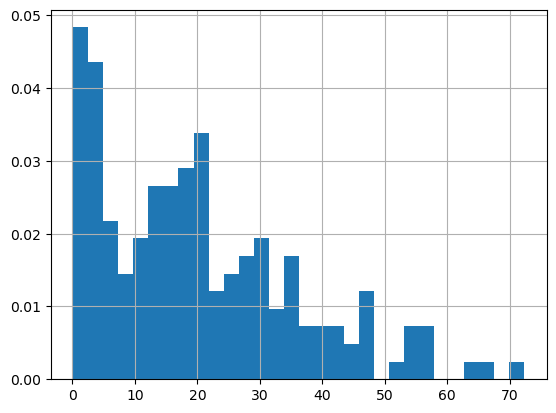

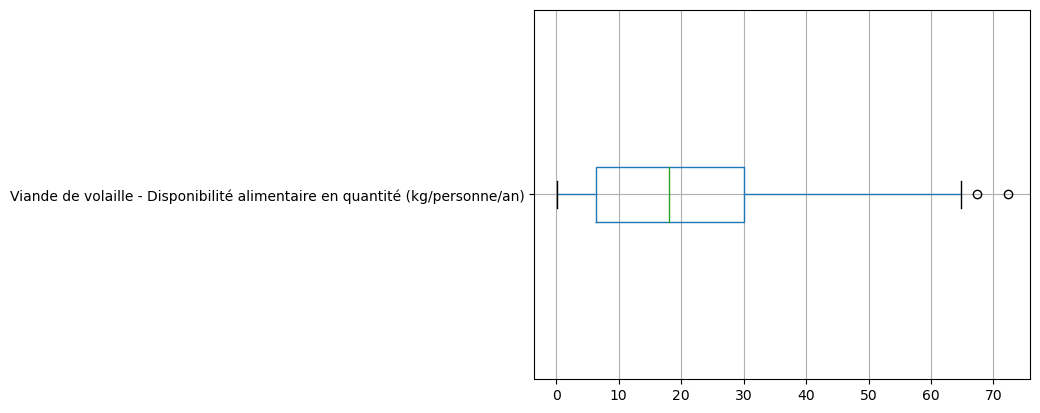

-----------------------------------------------------------------------------------------------------
PIB (US$) par habitant
-----------------------------------------------------------------------------------------------------
moy:
 14110.12
med:
 6092.622361254007
mod:
 0         450.900697
1         461.414751
2         499.310896
3         506.137215
4         515.293303
           ...      
167     73949.769215
168     75220.814442
169     81018.552734
170     83313.013992
171    111017.182246
Name: PIB (US$) par habitant, Length: 172, dtype: float64
var:
 372273258.1593091
ect:
 19294.38410935444
skw:
 2.2319739936024665
kur:
 5.403960105852267


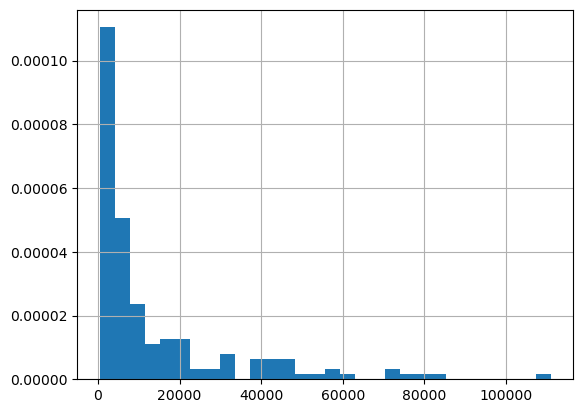

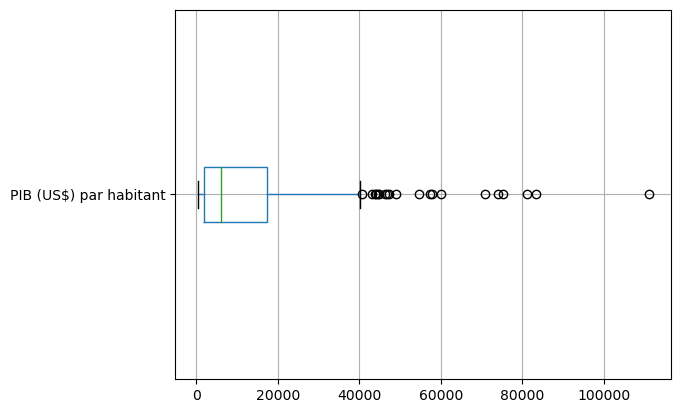

-----------------------------------------------------------------------------------------------------
Stabilité Politique
-----------------------------------------------------------------------------------------------------
moy:
 -0.06
med:
 0.015
mod:
 0    0.28
Name: Stabilité Politique, dtype: float64
var:
 0.7948139636289888
ect:
 0.8915233948859608
skw:
 -0.6774289256038258
kur:
 0.3716924463370348


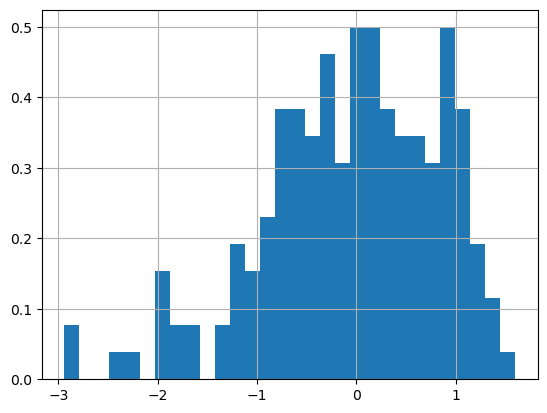

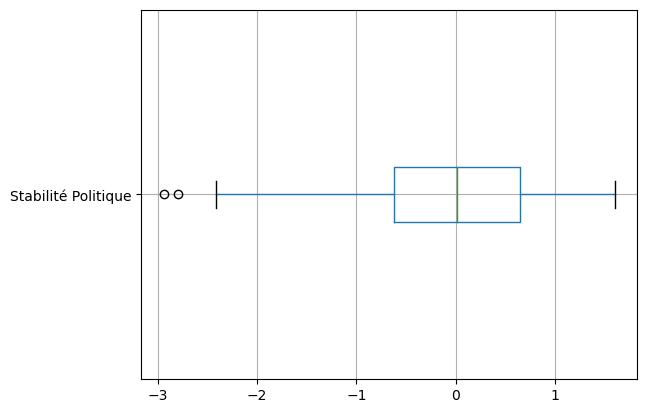

-----------------------------------------------------------------------------------------------------
Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)
-----------------------------------------------------------------------------------------------------
moy:
 261.81
med:
 217.40921963476865
mod:
 0    261.808033
Name: Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$), dtype: float64
var:
 542375.3280460897
ect:
 736.4613554329173
skw:
 10.528173989120734
kur:
 124.39927126290021


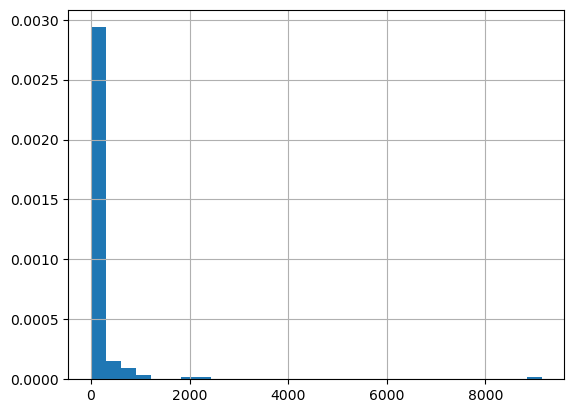

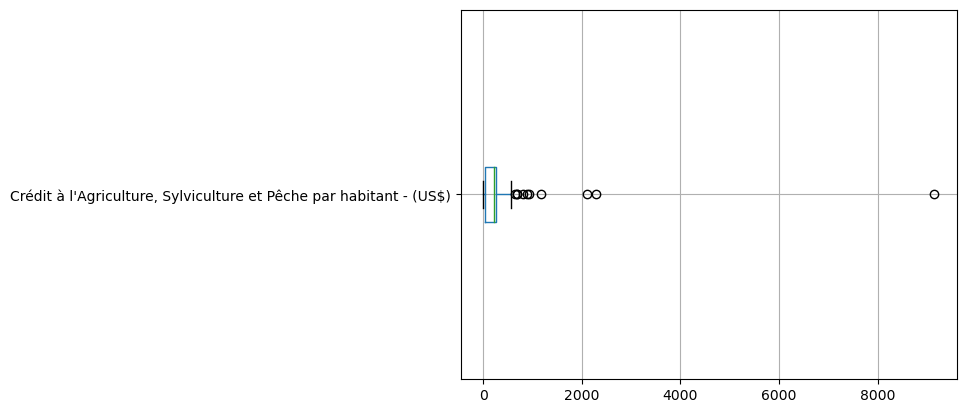

-----------------------------------------------------------------------------------------------------
Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)
-----------------------------------------------------------------------------------------------------
moy:
 1.39
med:
 0.7235499999999999
mod:
 0    0.0
Name: Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme), dtype: float64
var:
 3.5552231903866964
ect:
 1.8855299494801712
skw:
 4.450573444267335
kur:
 28.34511261594209


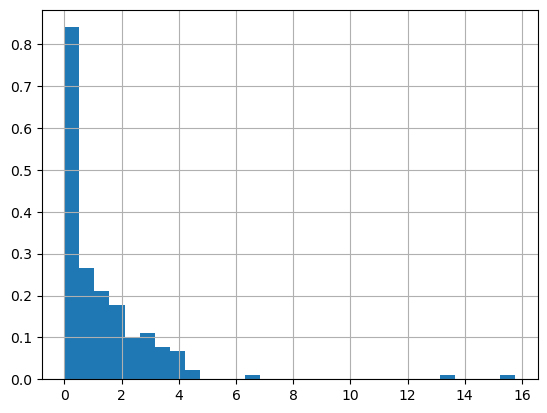

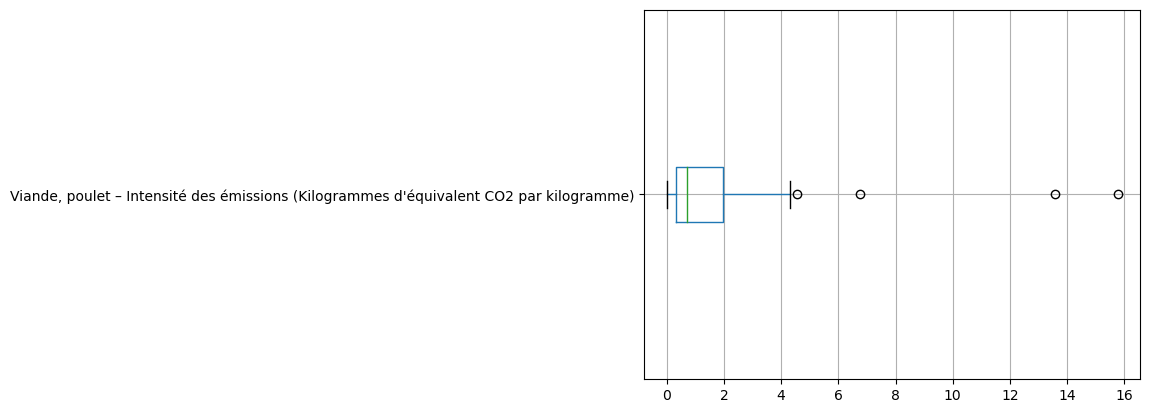

-----------------------------------------------------------------------------------------------------
Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)
-----------------------------------------------------------------------------------------------------
moy:
 52.62
med:
 37.65903135306296
mod:
 0    52.622785
Name: Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$), dtype: float64
var:
 5558.280339028169
ect:
 74.55387541253754
skw:
 4.140345557606485
kur:
 20.99259069307055


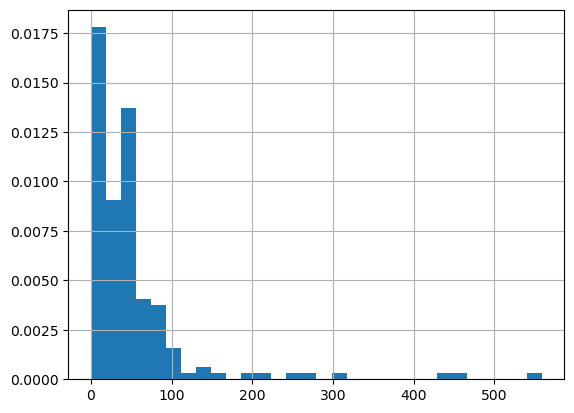

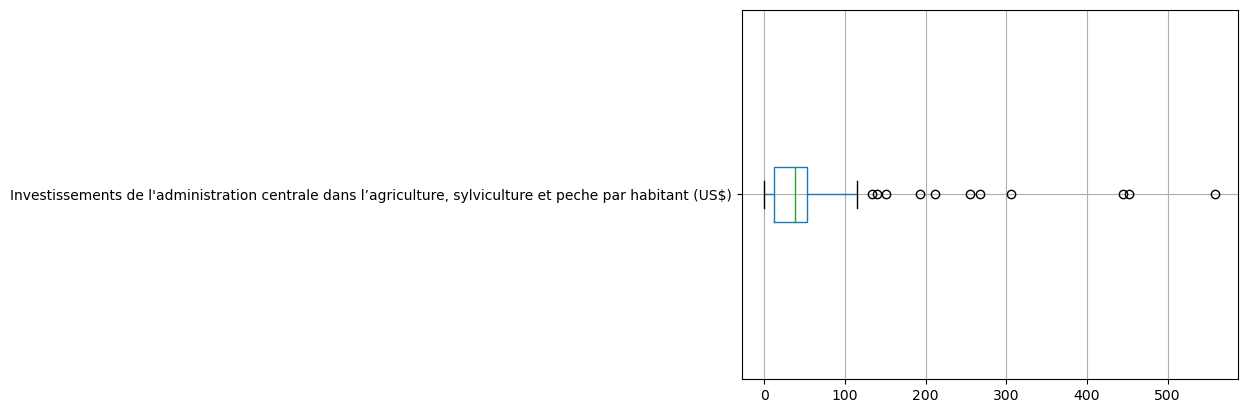

In [111]:
#Créez des histogrammes et box plots pour les colonnes
colonnes_analyse = [ 'Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an)',
 'PIB (US$) par habitant',
 'Stabilité Politique',
 "Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$)",
 "Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme)",
 "Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$)"]

for column in colonnes_analyse:
    print('-----------------------------------------------------------------------------------------------------')
    print(column)
    print('-----------------------------------------------------------------------------------------------------')
    print("moy:\n",round(analyse[column].mean(), 2))
    print("med:\n",analyse[column].median())
    print("mod:\n",analyse[column].mode())
    print("var:\n",analyse[column].var(ddof=0))
    print("ect:\n",analyse[column].std(ddof=0))
    print("skw:\n",analyse[column].skew())
    print("kur:\n",analyse[column].kurtosis())
    
    analyse[column].hist(density=True,bins=30)
    plt.show()  
    
    analyse.boxplot(column=column, vert=False)
    plt.show()

Pour la colonne Viande de volaille - Disponibilité alimentaire en quantité (kg/personne/an) il y a  2  outliers
---


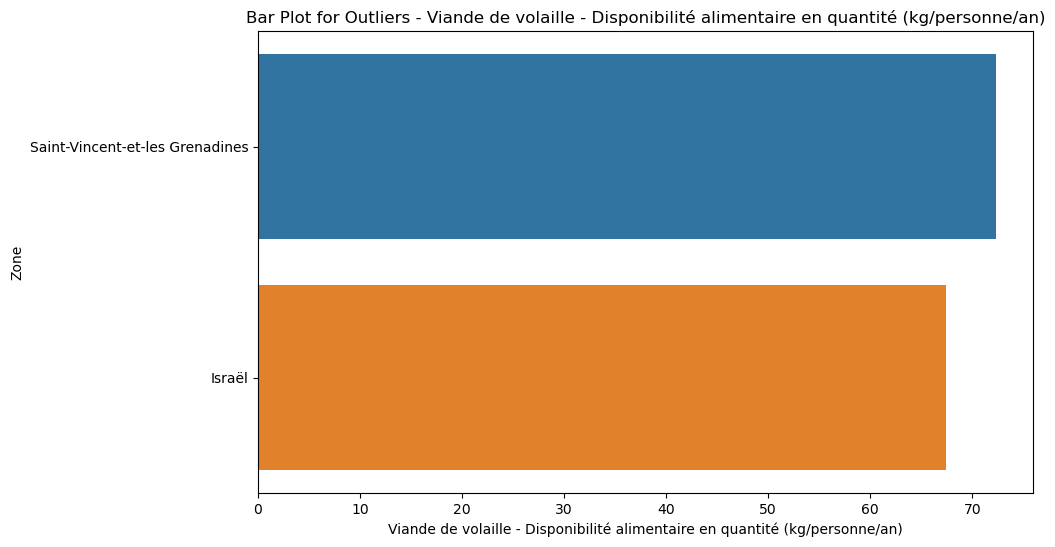

Pour la colonne PIB (US$) par habitant il y a  20  outliers
---


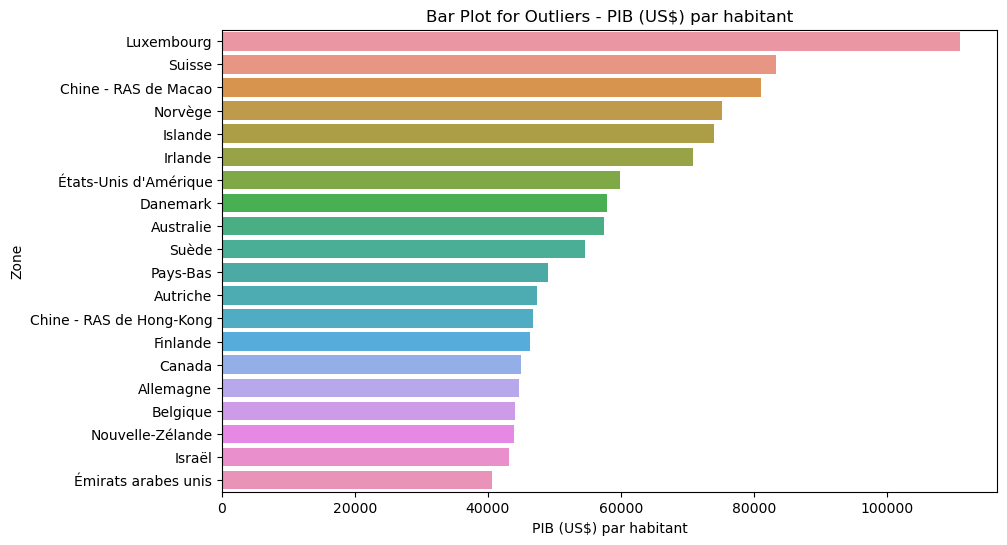

Pour la colonne Stabilité Politique il y a  2  outliers
---


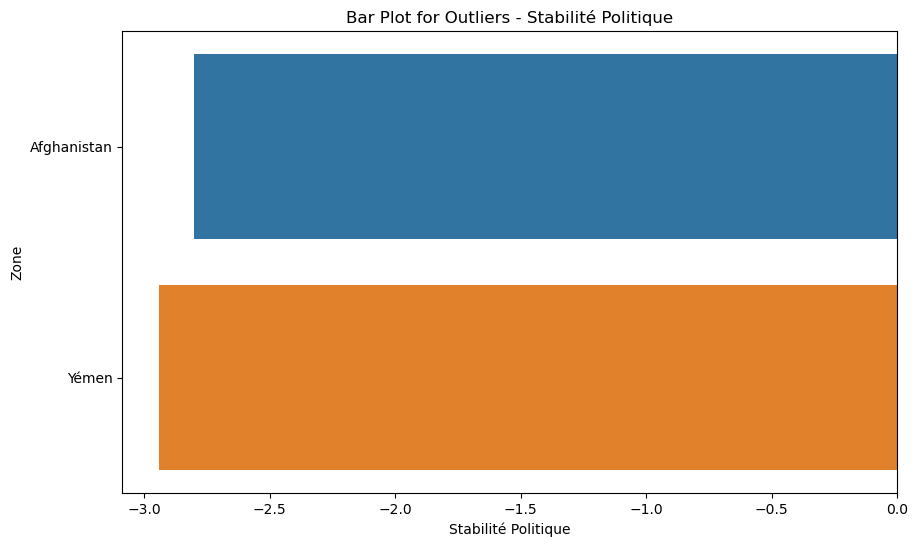

Pour la colonne Crédit à l'Agriculture, Sylviculture et Pêche par habitant - (US$) il y a  10  outliers
---


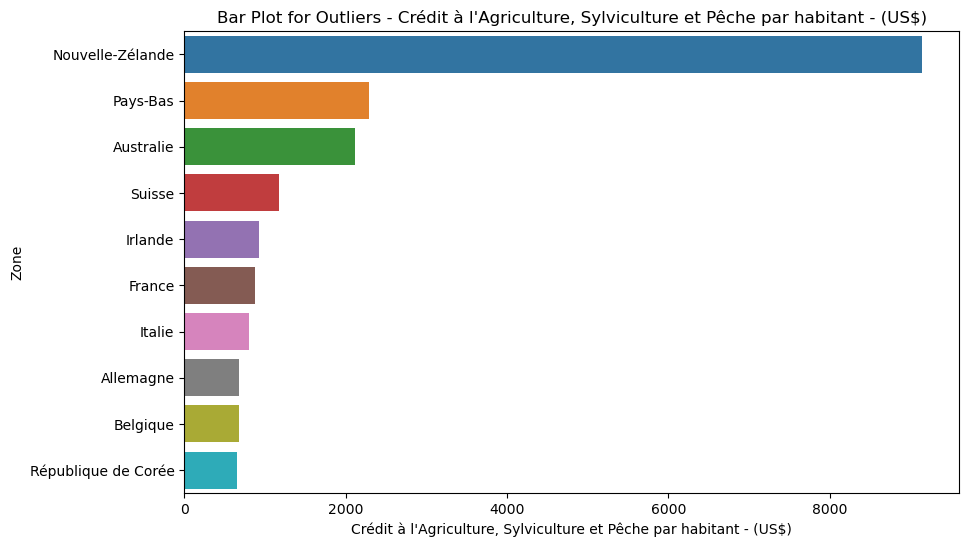

Pour la colonne Viande, poulet – Intensité des émissions (Kilogrammes d'équivalent CO2 par kilogramme) il y a  4  outliers
---


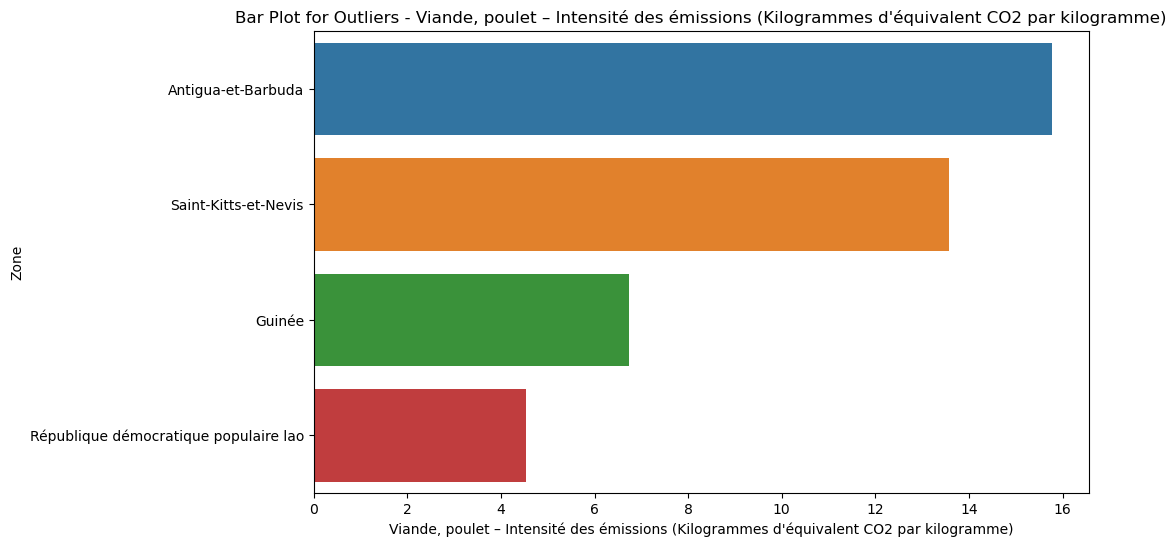

Pour la colonne Investissements de l'administration centrale dans l’agriculture, sylviculture et peche par habitant (US$) il y a  11  outliers
---


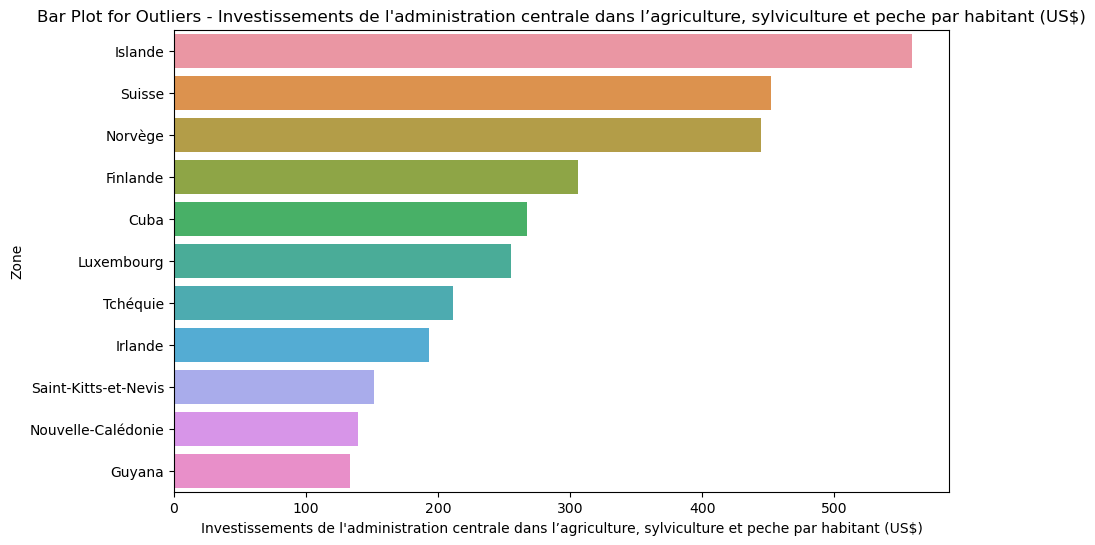

In [112]:
# Créez des barplots avec des outliers
for column in colonnes_analyse:
    quartiles = analyse[column].quantile([0.25, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    iqr = iqr * 1.5
    
    outliers = analyse.loc[(analyse[column] > quartiles[0.75] + iqr) | (analyse[column] < quartiles[0.25] - iqr)]
    outliers = outliers.sort_values(by=column, ascending=False)
    
    print('Pour la colonne', column, 'il y a ', outliers['Zone'].count(), ' outliers')
    print('---')
    
    if not outliers.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=outliers, y='Zone', x=column, estimator=sum)
        plt.title(f'Bar Plot for Outliers - {column}')
        plt.xlabel(column)
        plt.ylabel('Zone')
        plt.show()
    else:
        print('Pas des outliers pour cette colonne')

In [113]:
#Créez des fichiers csv's
analyse.to_csv('analyse.csv', index=False)
population.to_csv('analyse_population.csv', index=False)